In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [31]:
def idealLPF(imageName,cutoff):
    img = cv2.imread(imageName,cv2.IMREAD_GRAYSCALE)
    fimg = np.fft.fftshift(np.fft.fft2(img))
    row = fimg.shape[0]
    col = fimg.shape[1]
    for i in range(row):
        for j in range(col):
            if((i-row/2)*(i-row/2) + (j-col/2)*(j-col/2) > cutoff*cutoff):
                fimg[i][j] = 0
    filteredImg = np.abs(np.fft.ifft2(np.fft.fftshift(fimg)))
    plt.subplot(121),plt.imshow(img,cmap="gray")
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(filteredImg, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return filteredImg


In [32]:
def idealHPF(imageName,cutoff):
    img = cv2.imread(imageName,cv2.IMREAD_GRAYSCALE)
    fimg = np.fft.fftshift(np.fft.fft2(img))
    row = fimg.shape[0]
    col = fimg.shape[1]
    for i in range(row):
        for j in range(col):
            if((i-row/2)*(i-row/2) + (j-col/2)*(j-col/2) < cutoff*cutoff):
                fimg[i][j] = 0
    filteredImg = np.abs(np.fft.ifft2(np.fft.fftshift(fimg)))
    plt.subplot(121),plt.imshow(img,cmap="gray")
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(filteredImg, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return filteredImg

In [33]:
def butterworthCoef(i,j,row,col,cutoff,order):
    val = (1/(1+(((i-row/2)*(i-row/2) + (j-col/2)*(j-col/2))/(cutoff*cutoff))**(order)))
    return val
    

In [34]:
def butterworthLPF(imageName,order,cutoff):
    img = cv2.imread(imageName,cv2.IMREAD_GRAYSCALE)
    fimg = np.fft.fftshift(np.fft.fft2(img))
    row = fimg.shape[0]
    col = fimg.shape[1]
    for i in range(row):
        for j in range(col):
            fimg[i][j] = butterworthCoef(i,j,row,col,cutoff,order)*fimg[i][j]
    filteredImg = np.abs(np.fft.ifft2(np.fft.fftshift(fimg)))
    plt.subplot(121),plt.imshow(img,cmap="gray")
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(filteredImg, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return filteredImg

In [35]:
def butterworthHPF(imageName,order,cutoff):
    img = cv2.imread(imageName,cv2.IMREAD_GRAYSCALE)
    fimg = np.fft.fftshift(np.fft.fft2(img))
    row = fimg.shape[0]
    col = fimg.shape[1]
    for i in range(row):
        for j in range(col):
            fimg[i][j] = (1-butterworthCoef(i,j,row,col,cutoff,order))*fimg[i][j]
    filteredImg = np.abs(np.fft.ifft2(np.fft.fftshift(fimg)))
    plt.subplot(121),plt.imshow(img,cmap="gray")
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(filteredImg, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return filteredImg

In [36]:
def gaussianCoef(i,j,row,col,cutoff):
    val = np.exp(-((i-row/2)*(i-row/2) + (j-col/2)*(j-col/2))/(2*cutoff*cutoff))
    return val

In [37]:
def gaussianLPF(imageName,cutoff):
    img = cv2.imread(imageName,cv2.IMREAD_GRAYSCALE)
    fimg = np.fft.fftshift(np.fft.fft2(img))
    row = fimg.shape[0]
    col = fimg.shape[1]
    for i in range(row):
        for j in range(col):
            fimg[i][j] = gaussianCoef(i,j,row,col,cutoff)*fimg[i][j]
    filteredImg = np.abs(np.fft.ifft2(np.fft.fftshift(fimg)))
    plt.subplot(121),plt.imshow(img,cmap="gray")
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(filteredImg, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return filteredImg

In [38]:
def gaussianHPF(imageName = None,cutoff = 5,img = None):
    if img is None:
        img = cv2.imread(imageName,cv2.IMREAD_GRAYSCALE)
    fimg = np.fft.fftshift(np.fft.fft2(img))
    row = fimg.shape[0]
    col = fimg.shape[1]
    for i in range(row):
        for j in range(col):
            fimg[i][j] = (1-gaussianCoef(i,j,row,col,cutoff))*fimg[i][j]
    filteredImg = np.abs(np.fft.ifft2(np.fft.fftshift(fimg)))
    plt.subplot(121),plt.imshow(img,cmap="gray")
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(filteredImg, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return filteredImg

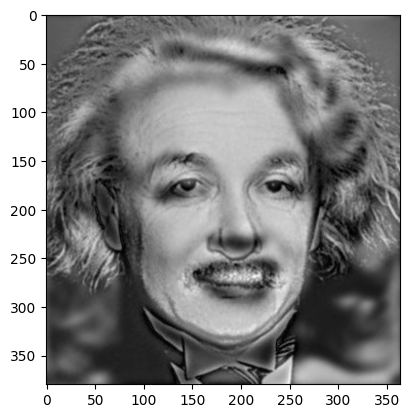

In [39]:

eimg = cv2.imread("einstein.png",cv2.IMREAD_GRAYSCALE)
mimg = cv2.imread("marilyn.png",cv2.IMREAD_GRAYSCALE)
feimg = np.fft.fftshift(np.fft.fft2(eimg))
fmimg = np.fft.fftshift(np.fft.fft2(mimg))
fres = feimg+fmimg
row = eimg.shape[0]
col = eimg.shape[1]
cutoff = 20
order = 2
for i in range(row):
    for j in range(col):
        val = butterworthCoef(i,j,row,col,cutoff,order)
        fres[i][j] = (1-val)*feimg[i][j] + val*fmimg[i][j]
res = np.abs(np.fft.ifft2(np.fft.fftshift(fres)))
cv2.imwrite("./comb.png",res)
plt.imshow(res,cmap="gray")

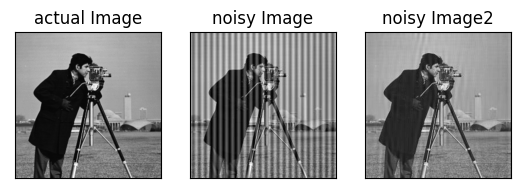

True

In [40]:

img = cv2.imread("./cameraman.jpg",cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread("./cameraman_noisy1.jpg",cv2.IMREAD_GRAYSCALE)
fimg = np.fft.fftshift(np.fft.fft2(img))
fimg1 = np.fft.fftshift(np.fft.fft2(img1))
cv2.imwrite("./frequencydomain/cameraman_noisy1.jpg",10*np.log(np.abs(fimg1)+1))
row = fimg1.shape[0]
col = fimg1.shape[1]

ctr = 25
wth = 7
rw = 5
for i in range(row//2-rw,row//2+rw):
    for j in range(col//2-ctr-wth,col//2-ctr+wth):
        fimg1[i][j] = 0

for i in range(row//2-rw,row//2+rw):
    for j in range(col//2+ctr-wth,col//2+ctr+wth):
        fimg1[i][j] = 0

cv2.imwrite("./frequencydomain/repairedcameramanfftnoisy1.jpg",10*np.log(np.abs(fimg1)+1))
rimg = np.abs(np.fft.ifft2(np.fft.fftshift(fimg1)))

plt.subplot(131),plt.imshow(img,cmap="gray")
plt.title('actual Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img1, cmap = 'gray')
plt.title('noisy Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(rimg, cmap = 'gray')
plt.title('restored Image'), plt.xticks([]), plt.yticks([])

plt.title('noisy Image2'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("./restorenoisy/cameraman_noisy1.png",rimg)



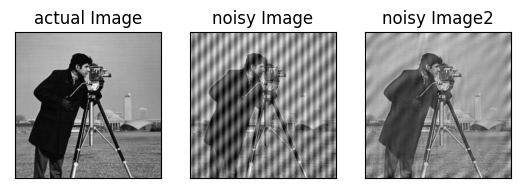

True

In [41]:
img = cv2.imread("./cameraman.jpg",cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread("./cameraman_noisy2.jpg",cv2.IMREAD_GRAYSCALE)
fimg = np.fft.fftshift(np.fft.fft2(img))
fimg1 = np.fft.fftshift(np.fft.fft2(img1))
cv2.imwrite("./frequencydomain/cameraman_noisy2.jpg",10*np.log(np.abs(fimg1)+1))
row = fimg1.shape[0]
col = fimg1.shape[1]

ctr = 7
wth = 4
rw = 5
for i in range(row//2-ctr-wth,row//2-ctr+wth):
    for j in range(col//2-ctr-wth,col//2-ctr+wth):
        fimg1[i][j] = 0

for i in range(row//2+ctr-wth,row//2+ctr+wth):
    for j in range(col//2+ctr-wth,col//2+ctr+wth):
        fimg1[i][j] = 0

ctr = 25
wth = 7
rw = 5
for i in range(row//2-rw,row//2+rw):
    for j in range(col//2-ctr-wth,col//2-ctr+wth):
        fimg1[i][j] = 0

for i in range(row//2-rw,row//2+rw):
    for j in range(col//2+ctr-wth,col//2+ctr+wth):
        fimg1[i][j] = 0

#cv2.imwrite("./cameramanfft.jpg",10*np.log(np.abs(fimg)+1))
cv2.imwrite("./frequencydomain/repairedcameramanfftnoisy2.jpg",10*np.log(np.abs(fimg1)+1))
rimg = np.abs(np.fft.ifft2(np.fft.fftshift(fimg1)))


plt.subplot(131),plt.imshow(img,cmap="gray")
plt.title('actual Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img1, cmap = 'gray')
plt.title('noisy Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(rimg, cmap = 'gray')
plt.title('restored Image'), plt.xticks([]), plt.yticks([])

plt.title('noisy Image2'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("./restorenoisy/cameraman_noisy2.png",rimg)

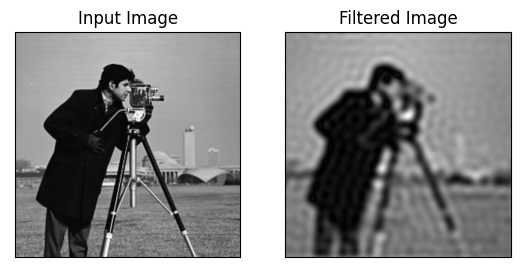

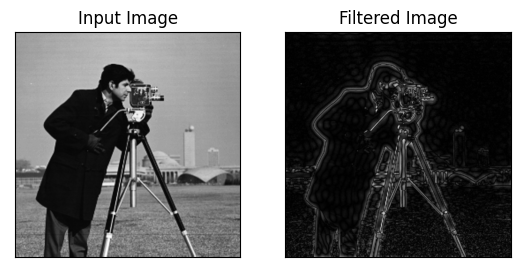

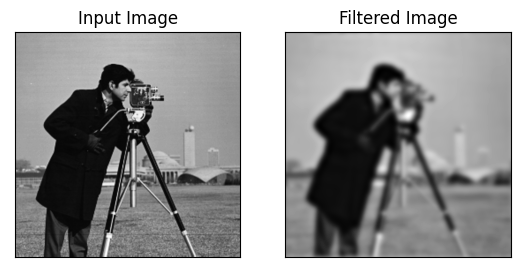

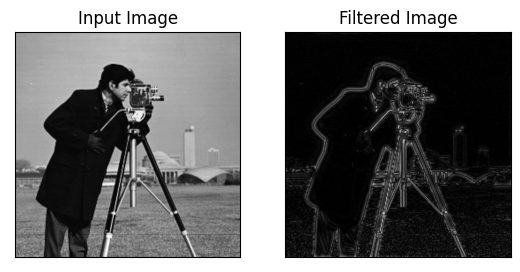

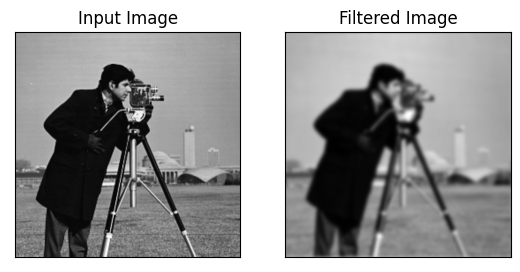

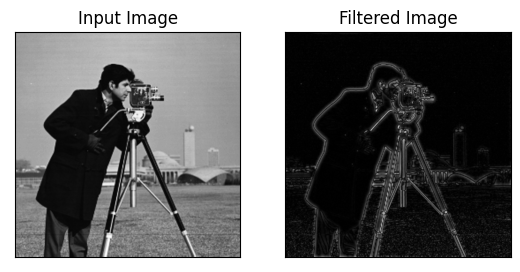

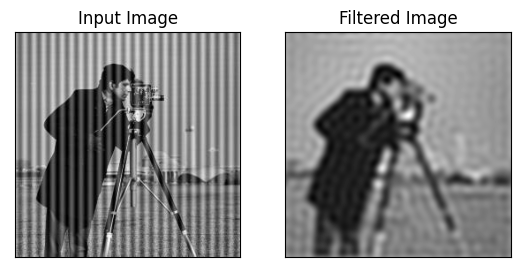

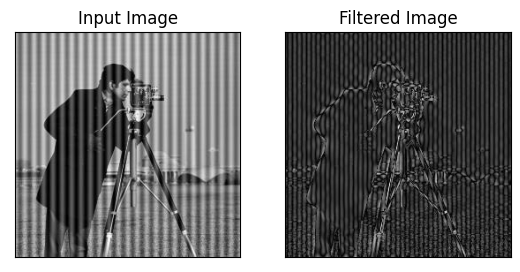

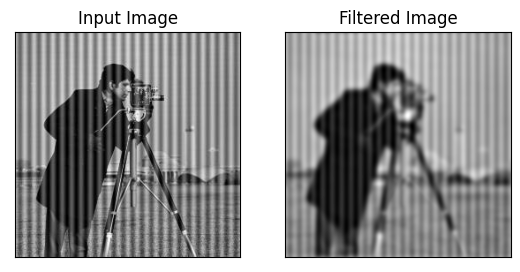

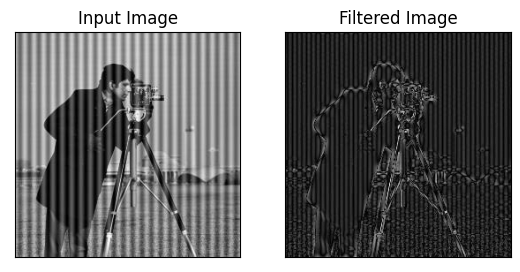

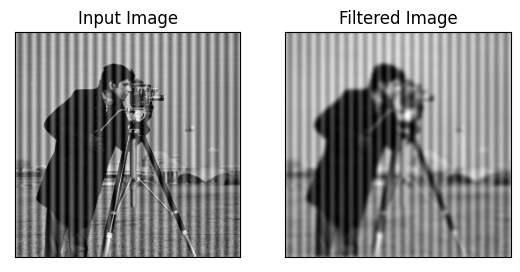

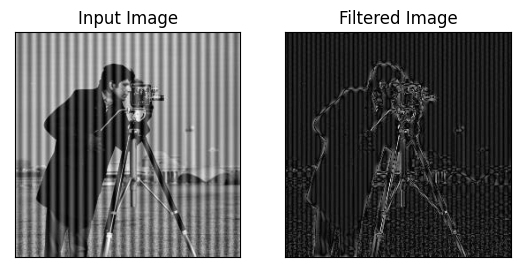

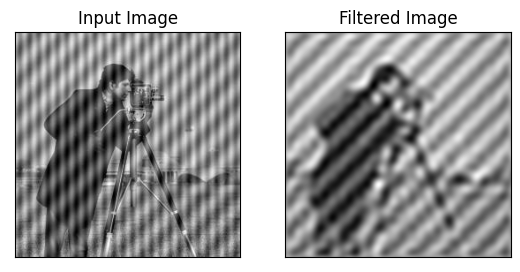

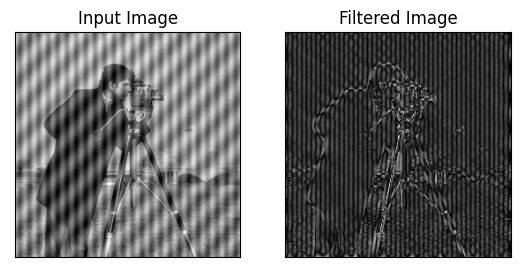

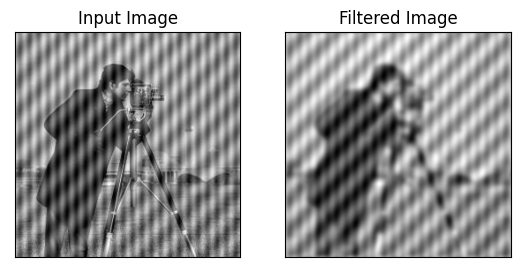

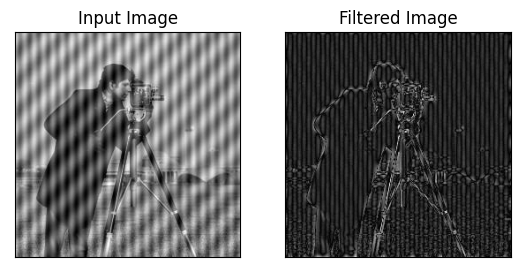

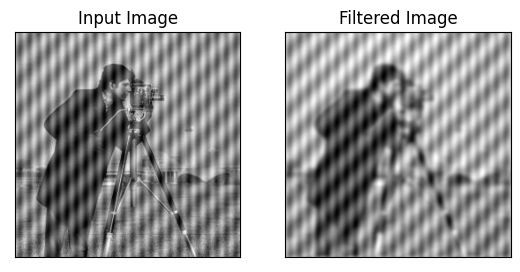

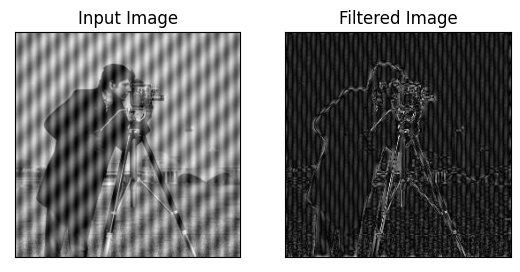

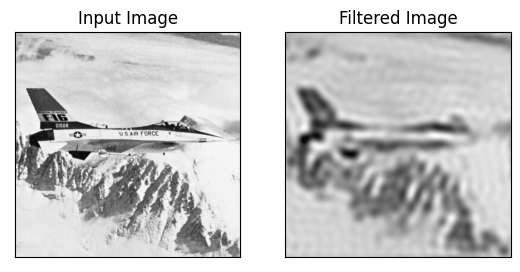

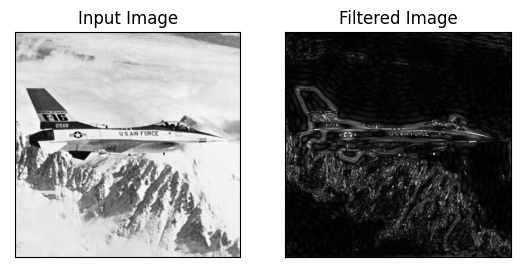

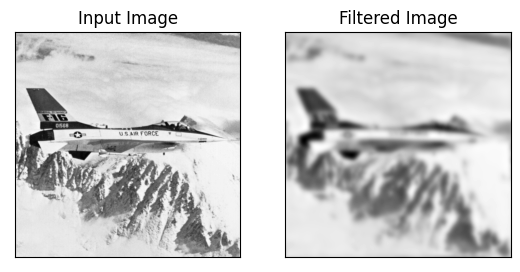

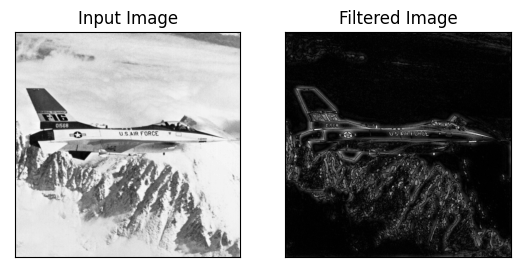

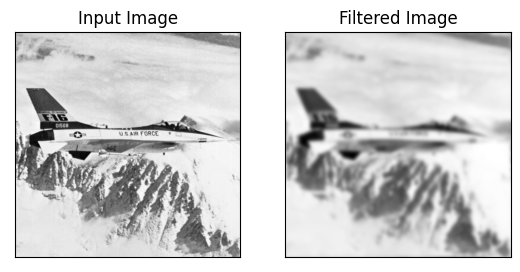

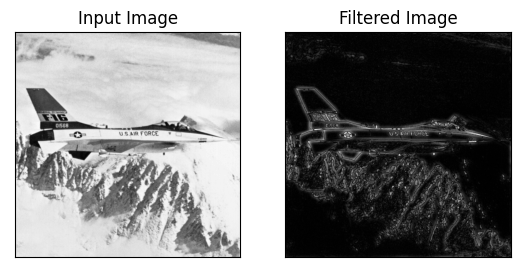

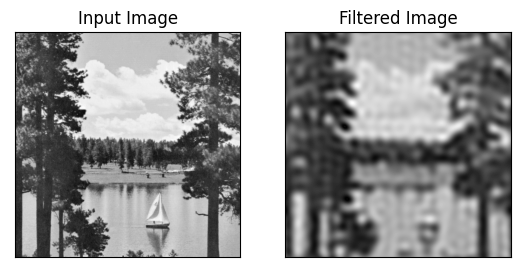

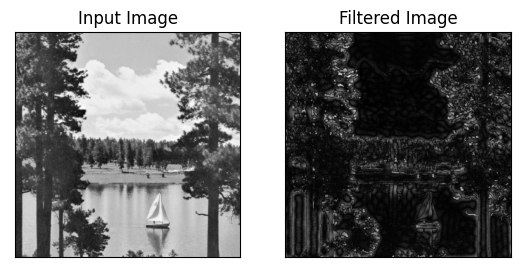

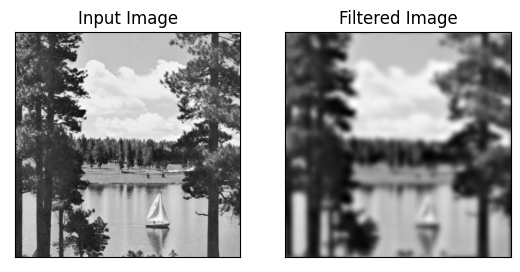

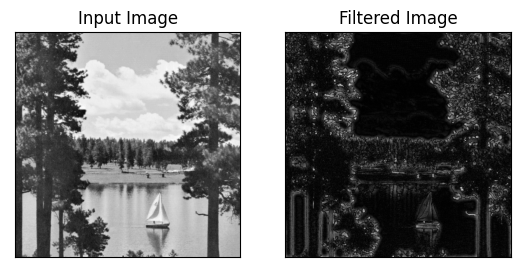

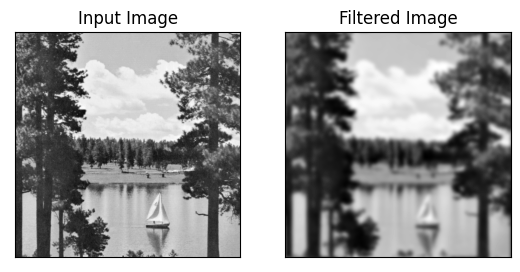

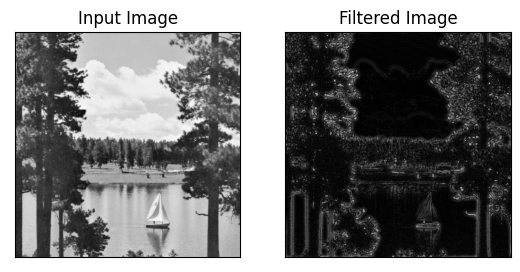

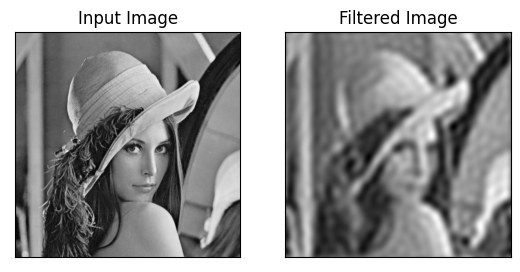

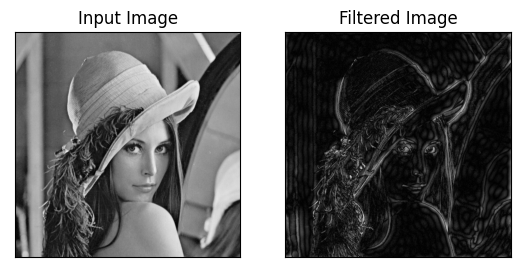

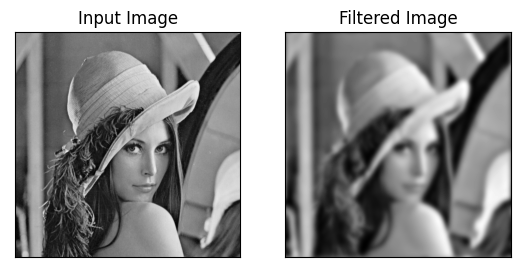

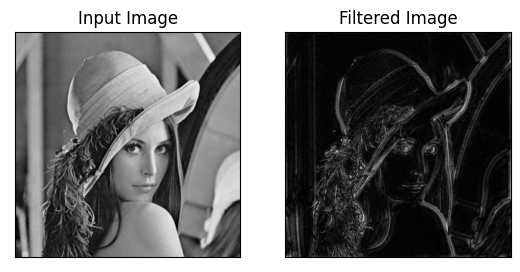

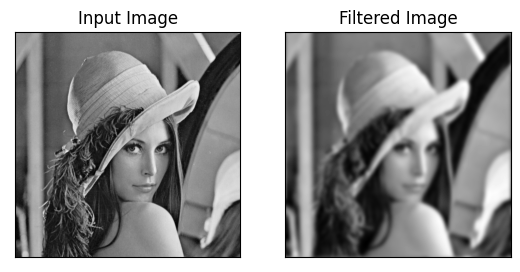

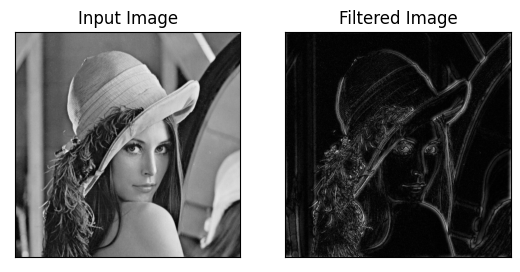

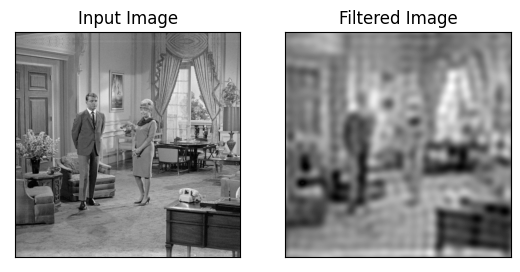

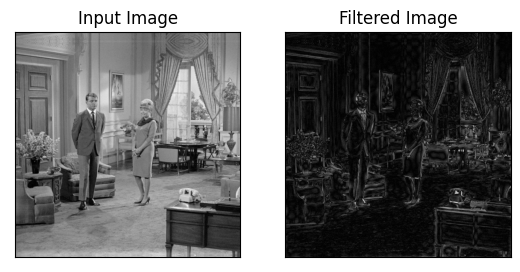

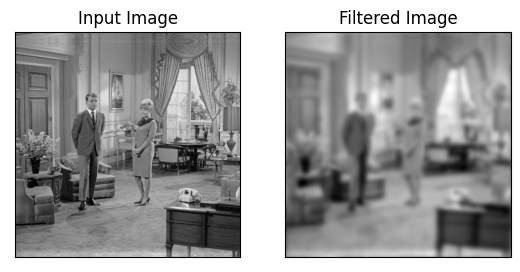

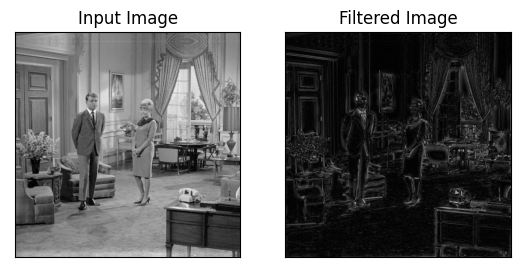

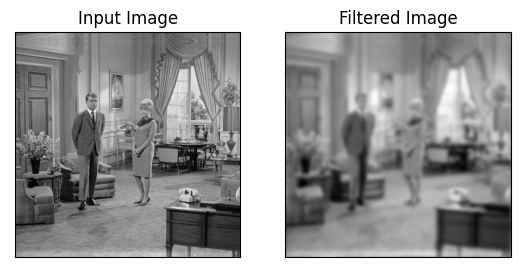

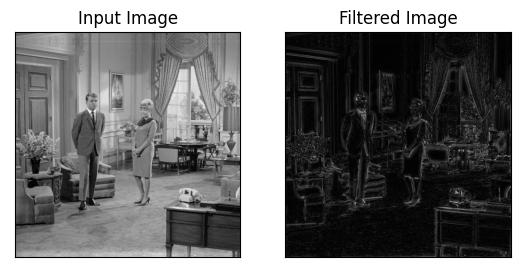

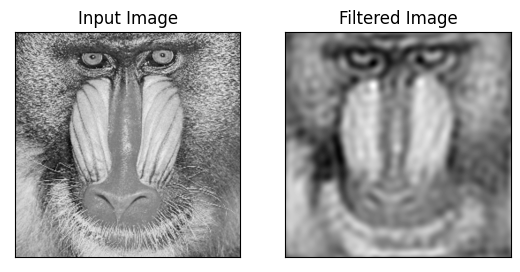

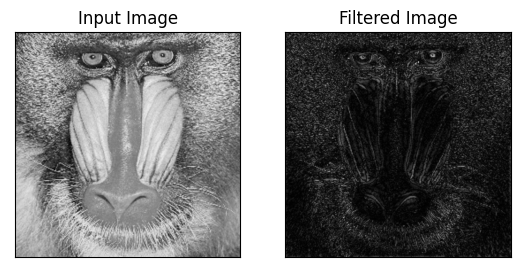

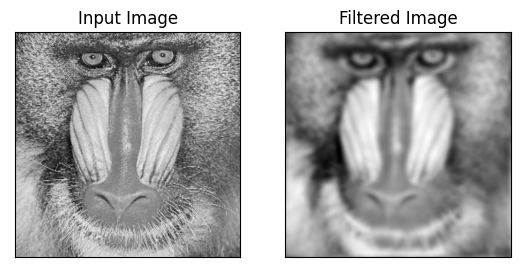

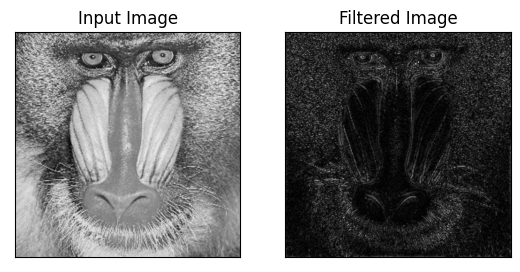

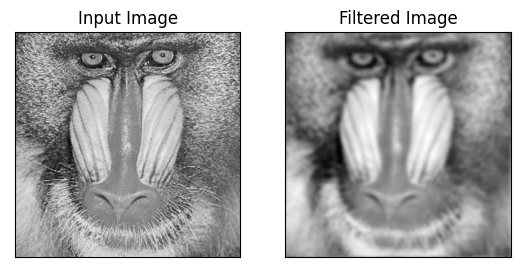

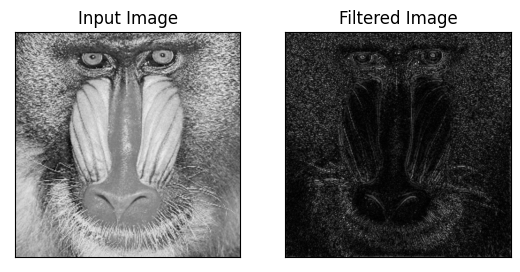

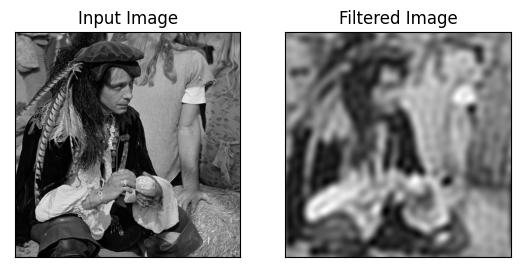

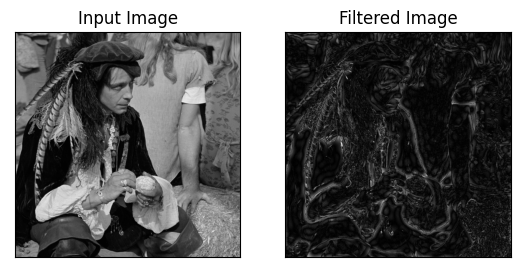

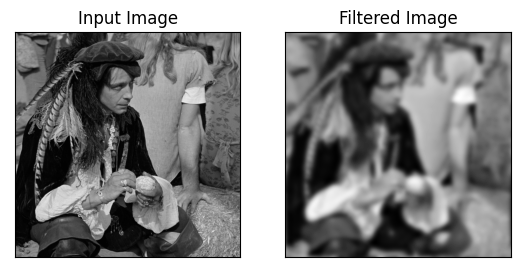

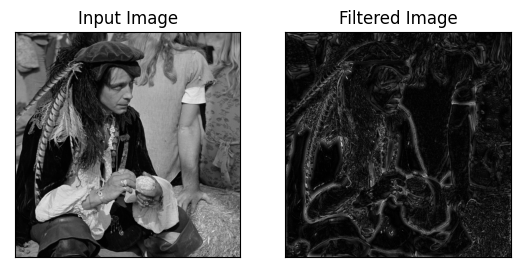

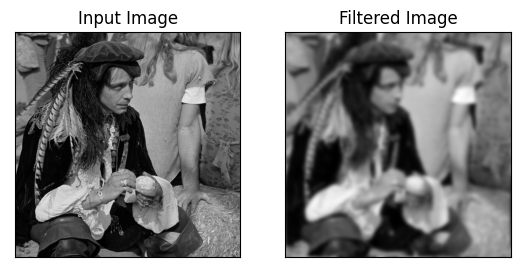

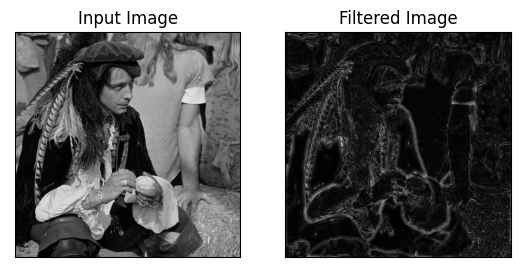

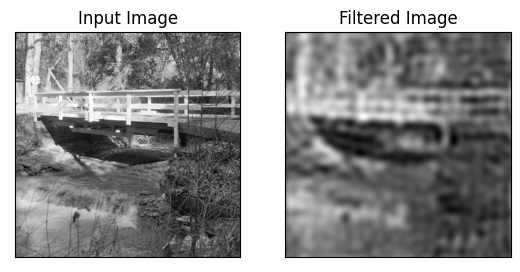

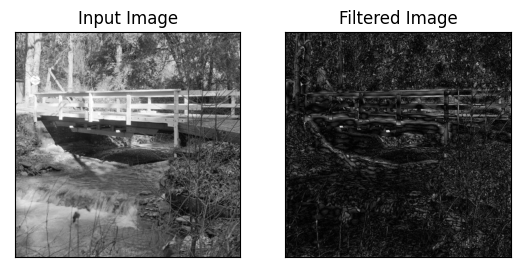

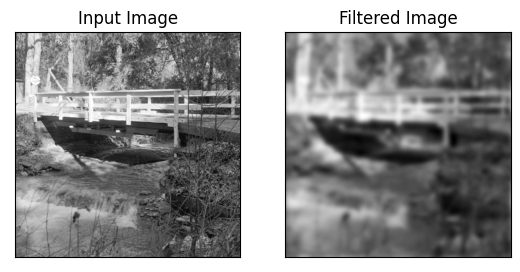

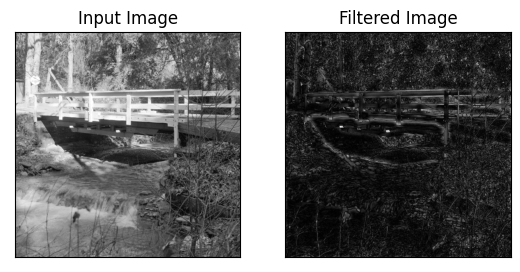

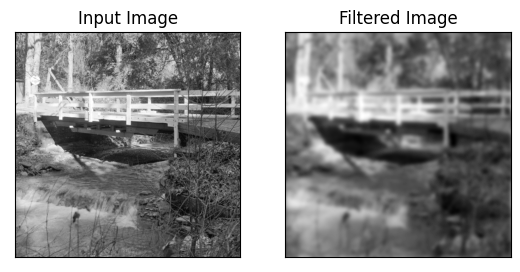

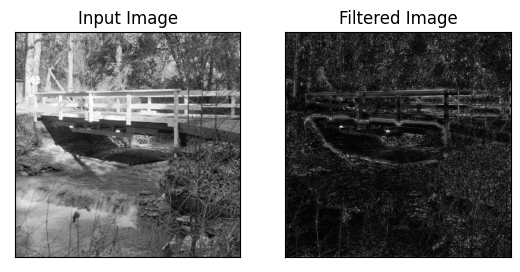

In [42]:
names = ["cameraman.jpg","cameraman_noisy1.jpg","cameraman_noisy2.jpg","jetplane.jpg","lake.jpg","lena.jpg","livingroom.jpg","mandril.jpg","pirate.jpg","walkbridge.jpg"]
cutoff = 20
order = 2
for name in names:
    img = idealLPF(name,cutoff)
    cv2.imwrite("./output/idealLPF"+name,img)
    img = idealHPF(name,cutoff)
    cv2.imwrite("./output/idealHPF"+name,img)
    img = butterworthLPF(name,order,cutoff)
    cv2.imwrite("./output/butterworthLPF"+name,img)
    img = butterworthHPF(name,order,cutoff)
    cv2.imwrite("./output/butterworthHPF"+name,img)
    img = gaussianLPF(name,cutoff)
    cv2.imwrite("./output/gaussianLPF"+name,img)
    img = gaussianHPF(name,cutoff)
    cv2.imwrite("./output/gaussianHPF"+name,img)

